### Keras - MNIST MLP

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
from keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Using TensorFlow backend.


    You'll obtain around 98% with 20 epochs

    Prepare Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

    Definition of a Simple  Network

In [9]:
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

    Method Fit Trains Network !

In [10]:
history = model.fit(x_train, y_train, batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 143us/step - loss: 2.0571 - acc: 0.2270 - val_loss: 1.8733 - val_acc: 0.2827
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 1.7882 - acc: 0.3200 - val_loss: 1.7057 - val_acc: 0.3770
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 1.6518 - acc: 0.4080 - val_loss: 1.5872 - val_acc: 0.4465
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 1.5434 - acc: 0.4654 - val_loss: 1.4900 - val_acc: 0.4936
Epoch 5/10
60000/60000 [==============================] - 8s 131us/step - loss: 1.4519 - acc: 0.5064 - val_loss: 1.4082 - val_acc: 0.5256
Epoch 6/10
60000/60000 [==============================] - 8s 135us/step - loss: 1.3782 - acc: 0.5315 - val_loss: 1.3479 - val_acc: 0.5326
Epoch 7/10
60000/60000 [==============================] - 8s 135us/step - loss: 1.3230 - acc: 0.5423 - val_loss: 1.3005 - 

Test loss: 1.2171636516571045
Test accuracy: 0.5653
Train accuracy: 0.5674833333333333


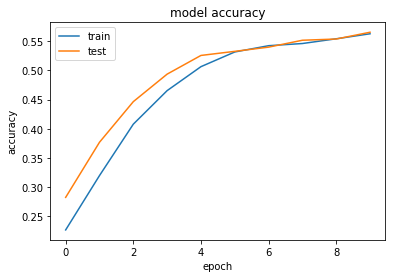

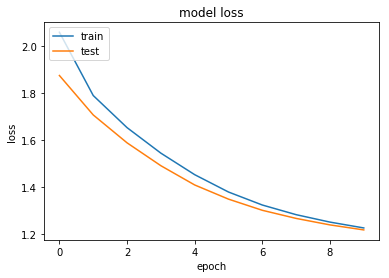

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)